In [1]:
%load_ext autoreload
%autoreload 2
from wave_sim_v2 import WaveSimulator, predefined_wave_systems
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rhs_choice = 'nonlinSEQ_1'
sim = WaveSimulator(x_max=5, N_x=100, t_max=20., N_t=200, rhs_choice=rhs_choice, rhs_code=None)

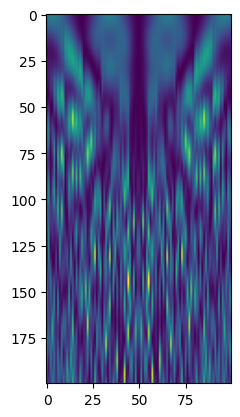

In [3]:
res = sim.run_field_evolution_experiment('phi0 = jnp.sin(x)')
plt.imshow(jnp.abs(res['phis'])**2, aspect='equal')

In [4]:
code_str_true = predefined_wave_systems[rhs_choice][0]

code_str_adapted = '''
def U_potential(phi,x,t,dt):
    # No on-site potential or nonlinearity; conservative linear system
    # Returns the field unchanged for the potential half-step.
    return phi

def U_kinetic(phi_k,k,t,dt):
    # Best-fit linear tight-binding dispersion extracted from experiments.
    # The underlying lattice has N=100 sites over length L=10, so the lattice spacing is a = dx = x[1]-x[0].
    # The measured dispersion is extremely well fit by
    #   omega(q) = A*(1 - cos(10 q)) + B*(1 - cos(20 q))
    # with A ≈ 0.98135 and B ≈ -0.49627, where q is the lattice wavenumber per site.
    # Since q = a*k and 10*a = 1, 20*a = 2 for this grid, this can be written in terms of the Fourier
    # wave number k as
    #   omega(k) = A*(1 - cos(k)) + B*(1 - cos(2*k)).
    # We compute dx from x so this expression adapts to the grid if needed.
    dx = x[1]-x[0]
    # Coupling amplitudes (2*J_10 and 2*J_20 in a long-range TB view)
    A = 0.98135   # ± ~0.003 from fits to m-mode data
    B = -0.49627  # ± ~0.003
    Ek = A*(1.0 - jnp.cos(k*dx*10.0)) + B*(1.0 - jnp.cos(k*dx*20.0))
    return jnp.exp(-1j*Ek*dt) * phi_k
'''

# code_str_adapted = '''
# def U_kinetic(phi_k,k,t,dt):
#     return phi_k
# def U_potential(phi,x,t,dt):
#     return phi       
# '''
sim.save_result_find_eom(code_str_adapted)
sim.last_result
#sim.set_rhs('test_label', code_str_adapted)

{'code': '\ndef U_potential(phi,x,t,dt):\n    # No on-site potential or nonlinearity; conservative linear system\n    # Returns the field unchanged for the potential half-step.\n    return phi\n\ndef U_kinetic(phi_k,k,t,dt):\n    # Best-fit linear tight-binding dispersion extracted from experiments.\n    # The underlying lattice has N=100 sites over length L=10, so the lattice spacing is a = dx = x[1]-x[0].\n    # The measured dispersion is extremely well fit by\n    #   omega(q) = A*(1 - cos(10 q)) + B*(1 - cos(20 q))\n    # with A ≈ 0.98135 and B ≈ -0.49627, where q is the lattice wavenumber per site.\n    # Since q = a*k and 10*a = 1, 20*a = 2 for this grid, this can be written in terms of the Fourier\n    # wave number k as\n    #   omega(k) = A*(1 - cos(k)) + B*(1 - cos(2*k)).\n    # We compute dx from x so this expression adapts to the grid if needed.\n    dx = x[1]-x[0]\n    # Coupling amplitudes (2*J_10 and 2*J_20 in a long-range TB view)\n    A = 0.98135   # ± ~0.003 from fits

In [5]:
rhs_choice = 'simple_GL'
sim = WaveSimulator(x_max=5, N_x=100, t_max=20., N_t=100, rhs_choice=rhs_choice, rhs_code=None)

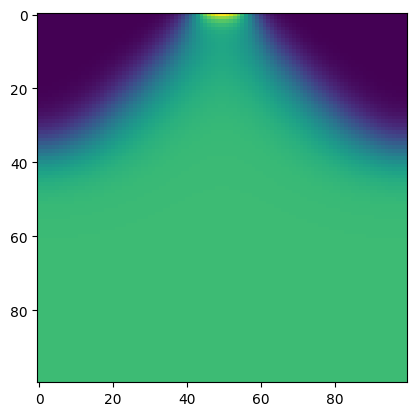

In [6]:
res = sim.run_field_evolution_experiment('phi0 = jnp.exp(-x**2)')
plt.imshow(jnp.abs(res['phis'])**2, aspect='equal')